In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [5]:
df_train_original = pd.read_csv('train.csv')
df_validation_original = pd.read_csv('validation.csv')

In [6]:
df_train_original['payprice'].max()

300

In [2]:
# using pandas function to get the summary
def QuickConstant(data,p):
    constantBiddingData =data[data['payprice']<= p]
    constantBiddingData = constantBiddingData[['click','payprice']].cumsum()
    constantBiddingData = constantBiddingData[constantBiddingData['payprice']<6250000]
    imps = len(constantBiddingData.index)
    click = constantBiddingData['click'].max()
    cost = constantBiddingData['payprice'].max()
    return imps, click, cost
# set up a pandas dateframe for our summary
def getConstantDataFrame(data):
    const = pd.DataFrame()
    const['constants'] = np.arange(0,302,4)

    im = []
    clks = []
    ct = []
    #agt = []
    for con in const['constants']:
        [imps, clicks, cost] = QuickConstant(data,con)#constantBidding(data[['click','payprice']],con)
        im.append(imps)
        clks.append(clicks)
        ct.append(cost)
        #agt.append(ad_go_through)
    const['imps_won'] = im
    const['total_spend'] = ct
    # const['cost'] = cc
    const['clicks'] = clks
    #const['ad_go_through'] = agt
    const['CTR'] = const['clicks']/const['imps_won']
    const['eCPC'] = (const['total_spend']/const['clicks'])/1000
    const['CPM'] =  const['total_spend']/const['imps_won']
    const = const.set_index('constants')
    return const

In [9]:
#plot  the data 
def eva_plot(dataframe, xlabel):
    pic = plt.figure(figsize=(11,11))
    pic1 =pic.add_subplot(2,2,1)
    dataframe['clicks'].plot()
    plt.ylabel('Clicks')
    plt.xlabel(xlabel)

    pic2 =pic.add_subplot(2,2,2)
    dataframe['CTR'].plot()
    plt.ylabel('CTR')
    plt.xlabel(xlabel)

    pic3 =pic.add_subplot(2,2,3)
    dataframe['eCPC'].plot()
    plt.ylabel('eCPC')
    plt.xlabel(xlabel)

    pic4 =pic.add_subplot(2,2,4)
    dataframe['CPM'].plot()
    plt.ylabel('CPM')
    plt.xlabel(xlabel)

In [13]:
train = getConstantDataFrame(df_train_original)

MemoryError: 

In [11]:
validation = getConstantDataFrame(df_validation_original)

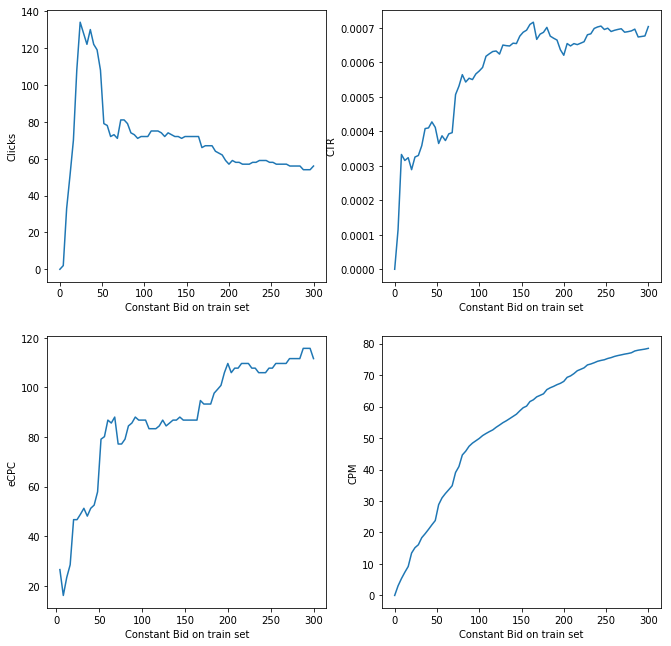

In [71]:
eva_plot(train,'Constant Bid on train set')

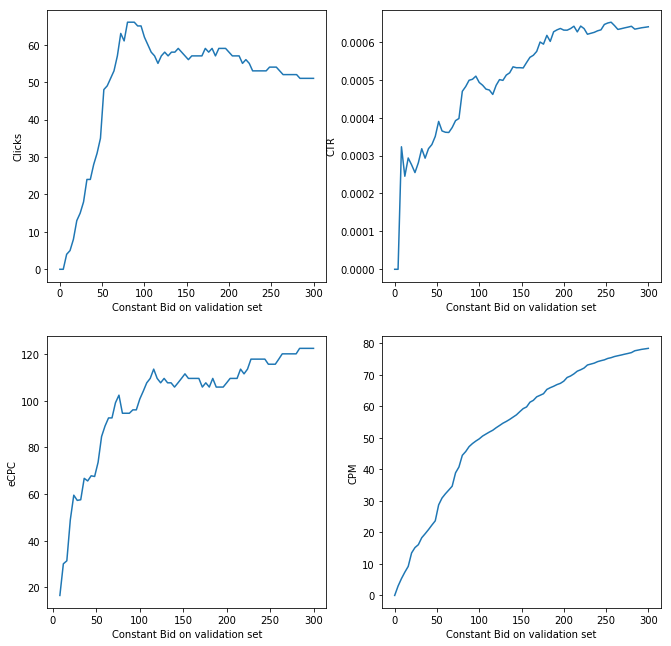

In [12]:
eva_plot(validation,'Constant Bid on validation set')

In [14]:
mostClick = validation.loc[(validation['clicks']==validation['clicks'].max())]
mostClick

,imps_won,total_spend,clicks,CTR,eCPC,CPM
constants,,,,,,
80,140549,6249972,66,0.000470,94.696545,44.468278
84,136862,6249961,66,0.000482,94.696379,45.666153
88,132325,6249991,66,0.000499,94.696833,47.232125


random bidding

In [5]:
print(list(range(1,100,10)))

[1, 11, 21, 31, 41, 51, 61, 71, 81, 91]


In [40]:
def getRandomDataFrame(data):
    dfDict = dict()
    #for different low bound, create a pandas dataframe
    for low in range(1,300,10):
        random = pd.DataFrame()


        im = []
        clks = []
        ct = []
        agt = []
        # cc = []
        #for different high bound ,run the bidding and get the impression,clicks ,etc,each [imps,clicks..]corresponding to 
        #one row of dataframe
        for high in range(low+1,300,10):

            [imps, clicks, cost, ad_go_through] = random_bidding(data,low,high)
            im.append(imps)
            clks.append(clicks)
            ct.append(cost)
        #     cc.append(click_cost)
            agt.append(ad_go_through)
        upper = list(range(low+1,300,10))
        random['upperbound'] = upper
        random['lowerbound'] = low
        random['imps_won'] = im
        random['total_spend'] = ct
        # random['cost'] = cc
        random['clicks'] = clks
        random['ad_go_through'] = agt
        random['CTR'] = random['clicks']/random['imps_won']
        random['eCPC'] = (random['total_spend']/random['clicks'])/1000
        random['CPM'] = random['total_spend']/random['imps_won']
        random = random.set_index('upperbound')
        dfDict[low] = random
    return dfDict
from random import randrange
def random_bidding(df_validation_original,low,high):
    ad_go_through = -1
    impression = 0.0
    clicks = 0
    cost = 0.0
#     click_cost = 0.0
    budget = 25000 * 1000
    
    budget = budget / 4
    
    for click, pay_price in df_validation_original[['click','payprice']].values:
        bidprice = randrange(low,high)
        ad_go_through += 1
        if bidprice > pay_price:
            impression += 1.0
            clicks += click
            cost += pay_price
        if cost >= budget:
            break
    return impression, clicks, cost, ad_go_through

In [41]:
d = getRandomDataFrame(df_train_original)

In [42]:
#find the best one 
best = []
for i in range(1,300,10):
    df = d[i]
    mostClick = df.loc[(df['clicks']==df['clicks'].max())]
    best.append(mostClick)
    
    print(mostClick)

            lowerbound  imps_won  total_spend  clicks  ad_go_through  \
upperbound                                                             
62                   1  278384.0    6250015.0     119        1276779   

                 CTR       eCPC        CPM  
upperbound                                  
62          0.000427  52.521134  22.451057  
            lowerbound  imps_won  total_spend  clicks  ad_go_through  \
upperbound                                                             
42                  11  381311.0    6250019.0     133        2115647   

                 CTR       eCPC       CPM  
upperbound                                 
42          0.000349  46.992624  16.39087  
            lowerbound  imps_won  total_spend  clicks  ad_go_through  \
upperbound                                                             
32                  21  405185.0    6250014.0     130        2093811   

                 CTR       eCPC        CPM  
upperbound                           

In [52]:
d[11]

,lowerbound,imps_won,total_spend,clicks,ad_go_through,CTR,eCPC,CPM
upperbound,,,,,,,,
12,11,130911.0,837531.0,40,2430980,0.000306,20.938275,6.397713
22,11,213230.0,2045635.0,71,2430980,0.000333,28.811761,9.593561
32,11,340310.0,4633271.0,108,2430980,0.000317,42.900657,13.614854
42,11,381311.0,6250019.0,133,2115647,0.000349,46.992624,16.390870
52,11,329933.0,6250018.0,123,1537633,0.000373,50.813154,18.943295
62,11,274715.0,6250020.0,113,1068252,0.000411,55.309912,22.750924
72,11,240686.0,6250023.0,97,812171,0.000403,64.433227,25.967539
82,11,209341.0,6250005.0,81,615534,0.000387,77.160556,29.855618
92,11,186591.0,6250013.0,80,486063,0.000429,78.125163,33.495790


In [48]:
best[5]

,lowerbound,imps_won,total_spend,clicks,ad_go_through,CTR,eCPC,CPM
upperbound,,,,,,,,
52,51,228610.0,6250008.0,86,601570,0.000376,72.674512,27.339172


In [55]:
#to get the overall summary for both upperbound and lowerbound
frame = []
for k in d.keys():
    
    frame.append(d[k])
summary = pd.concat(frame)    

In [56]:
mostClick = summary.loc[(summary['clicks']==summary['clicks'].max())]

In [57]:
mostClick

,lowerbound,imps_won,total_spend,clicks,ad_go_through,CTR,eCPC,CPM
upperbound,,,,,,,,
42,11,381311.0,6250019.0,133,2115647,0.000349,46.992624,16.39087


#Testing on validation


#  Testing on validation

In [62]:
[imps, clicks, cost, ad_go_through] = random_bidding(df_validation_original,11,42)

In [63]:
print([imps, clicks, cost, ad_go_through])

[54814.0, 15, 894953.0, 303924]
